# **Отбор признаков. Мультиколлинеарность**

**Отбор признаков** — процесс выбора важных признаков, наиболее влияющих на предсказание.

**ДЛЯ ЧЕГО НЕОБХОДИМО ОТБИРАТЬ ПРИЗНАКИ?**

Отбор признаков помогает:
1. Сократить время обучения.
2. Повысить качество предсказания. 

**КАК ПОНЯТЬ, КАКИЕ ПРИЗНАКИ БОЛЬШЕ ВСЕГО ВЛИЯЮТ НА ПРЕДСКАЗАНИЕ?**

Существует множество методов для отбора признаков. Однако для их использования необходимо понимать такие понятия, как **значимость**, **критерий значимости**, **гипотеза**. С этими понятиями вы познакомитесь в следующем модуле про выдвижение гипотез. 

Однако есть и ещё один способ отобрать признаки для обучения — **корреляция**, которую вы изучили в модуле *EDA-2. Математическая статистика в контексте EDA Юнит 3. Корреляция.*

**Мультиколлинеарность** — сильная корреляционная связь между признаками, отбираемыми для обучения.  
Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных. 
***
Процесс корреляционного анализа и удаление сильно скоррелированных признаков относят к одному из методов отбора признаков.

⬇️ Рассмотрим отбор признаков в Python. Для этого воспользуемся обучающим датасетом о цветках ириса.

Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* sepal length — длина наружной доли околоцветника;
* sepal width — ширина наружной доли околоцветника;
* petal length — длина внутренней доли околоцветника;
* petal width — ширина внутренней доли околоцветника.

✍️ На основании этого набора данных требуется построить модель, определяющую вид растения по данным измерений. 

In [12]:
import pandas as pd
from IPython.display import display
import seaborn as sns # импортируем seaborn для построения графиков
import matplotlib.pyplot as plt

In [13]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


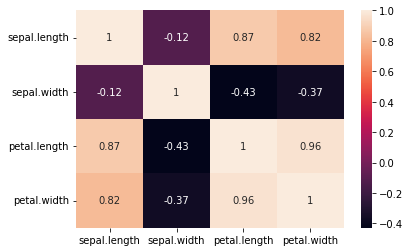

In [14]:
# Будем исследовать признаки, которые могут влиять на variety — sepal.length, sepal.width, petal.length, petal.width.
# Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

sns.heatmap(iris.corr(), annot=True); # включаем отображение коэффициентов

Чтобы построить модель на этом наборе данных, сделаем отбор признаков — **удалим признаки с очень сильной корреляцией** (где коэффициент корреляции +/-0.7 и выше).

Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: sepal.length и petal.width, petal.length и sepal.length, petal.width и petal.length.

Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:

In [15]:
iris = iris.drop(['petal.width'], axis=1)

In [16]:
# Однако второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length. Удалим и его:
iris = iris.drop(['petal.length'], axis=1)

In [17]:
# Посмотрим на результат:
iris

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


***
### **КАКОЙ ПРИЗНАК УДАЛЯТЬ?**
Как понять, какой признак необходимо удалить из пары скоррелированных признаков?

Вы можете удалить **любой** признак из пары. Однако вы можете оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация. 

**[Пример]**

Если мы округлим длину чашелистика и запишем её в новый признак sepal.length.round,

![](https://lms.skillfactory.ru/assets/courseware/v1/91e81bb7ddcfb6e8fc43e233d4edf323/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-eda-3-27.png)

то корреляция исходного признака sepal.length и нового признака sepal.length.round будет очень сильной. Это изображено на тепловой карте ниже.

![](https://lms.skillfactory.ru/assets/courseware/v1/0c504c53acbdfa5af1a02d80135a37b5/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-eda-3-28.png)

Корреляция между исходным признаком sepal.length и новым признаком sepal.length.round составила 0.94. При отборе признаков один из них необходимо удалить. В этом случае лучше выбрать sepal.length.round, так как с целым числом удобнее работать.

In [18]:
data = pd.read_csv('data/wine_cleared2.csv')
data.head(3)

,Unnamed: 0,country,description,designation,points,province,region_1,taster_name,taster_twitter_handle,title,...,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,years_diff,year.1
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,35,2013-01-01,0,0,1,0,Etna,"59,097,904",3298.0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,15,2011-01-01,0,0,0,0,Douro,"10,347,892",4029.0,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",3298.0,1


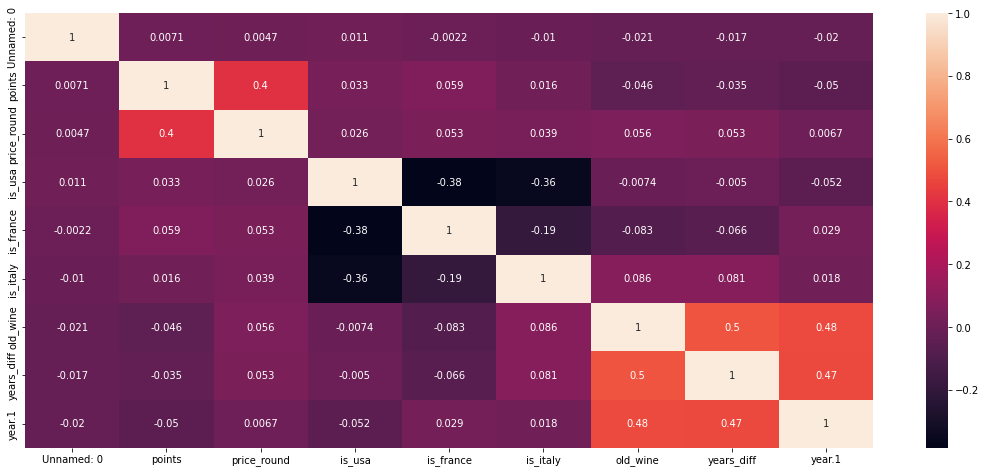

In [19]:
plt.figure(figsize=(19,8))
sns.heatmap(data.corr(), annot=True);

In [21]:
data = data.drop(['Unnamed: 0'], axis=1)

In [22]:
data.to_csv('data/wine_cleared2.csv', index=False)